In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [102]:
df =pd.read_csv("/Users/da-m1-40/Downloads/Final_Market.csv")
df

Unnamed: 0               Province Container Size_Grade  Weight_Kg  \
0               0                   CAPE     EC120         1L       12.0   
1               1                   CAPE     M4183         1L       18.3   
2               2                GAUTENG     AT200         1L       20.0   
3               3              TRANSVAAL     BJ090         1L        9.0   
4               4      WESTERN FREESTATE     PP100         1R       10.0   
...           ...                    ...       ...        ...        ...   
64371       64371              TRANSVAAL     AG100         1M       10.0   
64372       64372  IMPORTS - OUTSIDE RSA     BC180          X       18.0   
64373       64373              TRANSVAAL     TS035         1M        3.5   
64374       64374                  NATAL     BJ100         2M       10.0   
64375       64375                   CAPE     M4183         1L       18.3   

                  Commodities        Date  Low_Price  High_Price  Sales_Total  \
0          APPLE GRANNY SMITH  2020/03/10      108.0       112.0       3236.0   
1      APPLE GOLDEN DELICIOUS  2020/09/09      150.0       170.0      51710.0   
2           AVOCADO PINKERTON  2020/05/05       70.0        80.0       4860.0   
3          TOMATOES-LONG LIFE  2020/01/20       60.0        60.0        600.0   
4       POTATO SIFRA (WASHED)  2020/07/14       40.0        45.0      41530.0   
...                       ...         ...        ...         ...          ...   
64371             ONIONS MILD  2020/05/18       70.0        75.0      19695.0   
64372                  BANANA  2020/02/05      160.0       220.0      13560.0   
64373      TOMATOES-LONG LIFE  2020/08/20       20.0        20.0       6000.0   
64374                   LEMON  2020/08/18       50.0        80.0      16730.0   
64375              APPLE FUJI  2020/08/06      150.0       150.0        150.0   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand avg_price_per_kg  year  \
0                  29          348.0              0              9.3  2020   
1                 332         6075.6            822             8.51  2020   
2                  66         1320.0             50             3.68  2020   
3                  10           90.0              0             6.67  2020   
4                 927         9270.0            393             4.48  2020   
...               ...            ...            ...              ...   ...   
64371             281         2810.0           3583             7.01  2020   
64372              72         1296.0            887            10.46  2020   
64373             300         1050.0            900             5.71  2020   
64374             277         2770.0            372             6.04  2020   
64375               1           18.3              1              8.2  2020   

       month  day Selling_Price  
0          3   10   111.5862069  
1          9    9    155.753012  
2          5    5   73.63636364  
3          1   20            60  
4          7   14    44.8004315  
...      ...  ...           ...  
64371      5   18   70.08896797  
64372      2    5   188.3333333  
64373      8   20            20  
64374      8   18   60.39711191  
64375      8    6           150  

[64376 rows x 18 columns]

In [103]:
df.drop(columns=['Unnamed: 0', 'year','day','month','Selling_Price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 6.4+ MB


In [104]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%B')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64376 non-null  object        
 13  month             64376 non-null  object        
dtypes: datetime64[ns](1), 

In [105]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
month               0
dtype: int64

In [106]:
df['avg_price_per_kg'] = pd.to_numeric(df['avg_price_per_kg'], errors='coerce')

In [107]:
Average_value = df[df['Commodities'] == 'TOMATOES-LONG LIFE']['avg_price_per_kg'].mean()
Average_value

8.107872174590803

In [108]:
df1 = df[df['Commodities'] == 'TOMATOES-LONG LIFE']
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          3849 non-null   object        
 1   Container         3849 non-null   object        
 2   Size_Grade        3849 non-null   object        
 3   Weight_Kg         3849 non-null   float64       
 4   Commodities       3849 non-null   object        
 5   Date              3849 non-null   datetime64[ns]
 6   Low_Price         3849 non-null   float64       
 7   High_Price        3849 non-null   float64       
 8   Sales_Total       3849 non-null   float64       
 9   Total_Qty_Sold    3849 non-null   int64         
 10  Total_Kg_Sold     3849 non-null   float64       
 11  Stock_On_Hand     3849 non-null   int64         
 12  avg_price_per_kg  3849 non-null   float64       
 13  month             3849 non-null   object        
dtypes: datetime64[ns](1), float6

In [109]:
df1['avg_price_per_kg'] = pd.to_numeric(df1['avg_price_per_kg'], errors='coerce')




/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/2354460014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_price_per_kg'] = pd.to_numeric(df1['avg_price_per_kg'], errors='coerce')


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64370 non-null  float64       
 13  month             64376 non-null  object        
dtypes: datetime64[ns](1), 

In [111]:
province_sales = df1.groupby('Province')['Sales_Total'].sum()
bottom_provinces = province_sales.sort_values().head(5)
bottom_provinces

Province
GAUTENG            10620.0
NATAL             372835.0
KWAZULU NATAL     457082.0
MPUMALANGA       1293185.0
CAPE             2813218.0
Name: Sales_Total, dtype: float64

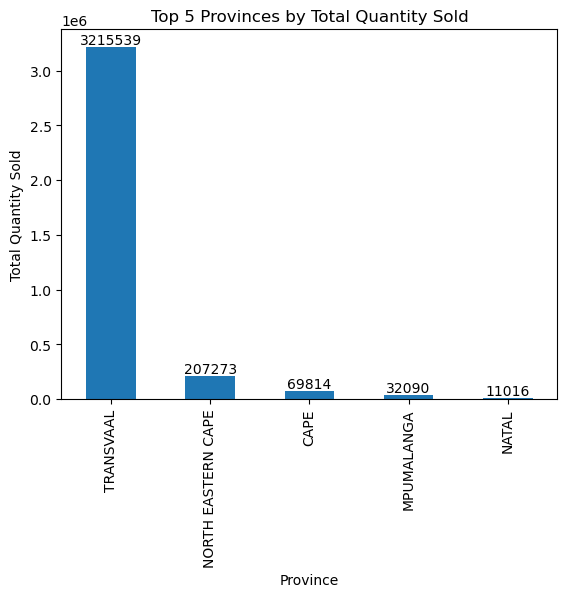

In [112]:
import matplotlib.pyplot as plt

top_provinces_sales = df1.groupby('Province')['Total_Qty_Sold'].sum().nlargest(5)
top_provinces_sales.plot(kind='bar', title='Top 5 Provinces by Total Quantity Sold', ylabel='Total Quantity Sold')

# Adding labels to the bars
for i, value in enumerate(top_provinces_sales):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


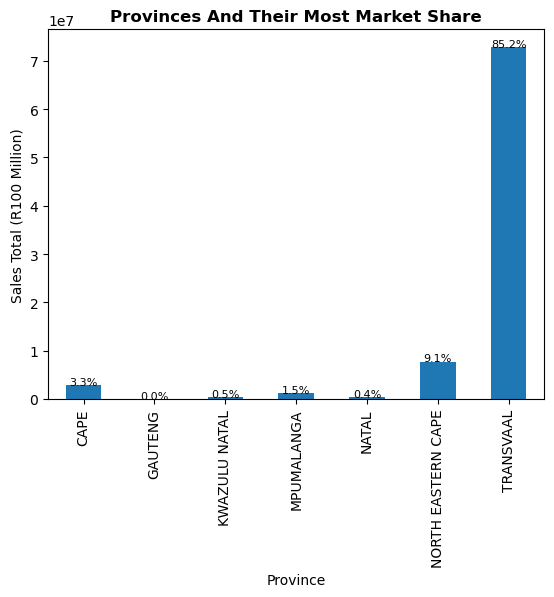

In [113]:
province_sales=df1.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=df1["Sales_Total"].sum()
percent=(province_sales/total_sales_all_provinces)*100
province_sales.plot(kind='bar',width=0.5)
plt.xlabel("Province")
plt.ylabel("Sales Total (R100 Million)")
plt.title('Provinces And Their Most Market Share', fontweight='bold')
for i, (value, percentage) in enumerate(zip(province_sales, percent)):
    plt.text(i, value + 10, f"{percentage:.1f}%", ha='center', fontsize=8)
plt.show()

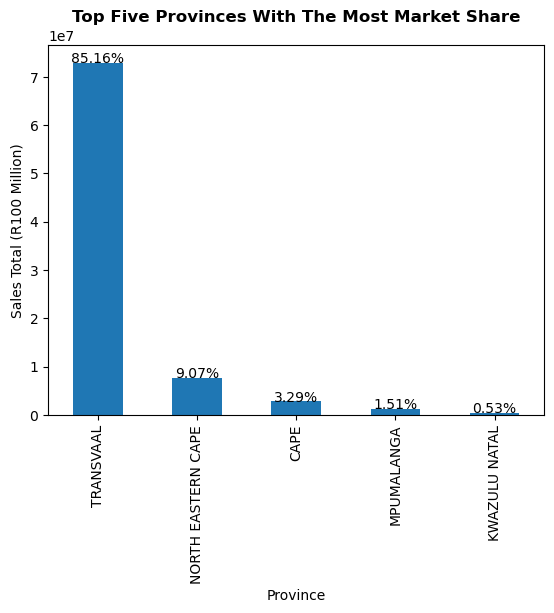

In [114]:
province_sales=df1.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=df1["Sales_Total"].sum()
topFive=province_sales.nlargest(5)
percent=(topFive/total_sales_all_provinces)*100
topFive.plot(kind='bar')
plt.xlabel("Province")
plt.ylabel("Sales Total (R100 Million)")
plt.title('Top Five Provinces With The Most Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.2f}%", ha='center')
plt.show()

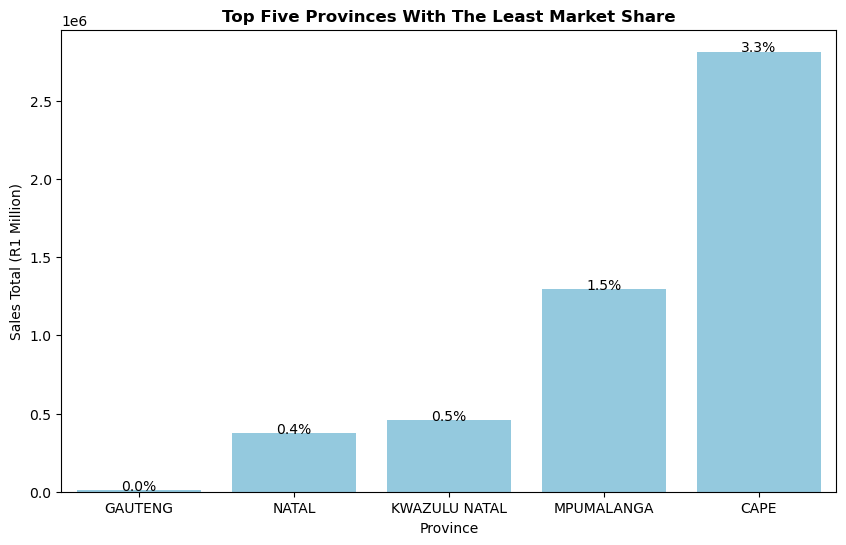

In [115]:
province_sales=df1.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=df1["Sales_Total"].sum()
topFive=province_sales.nsmallest(5)
percent=(topFive/total_sales_all_provinces)*100
plt.figure(figsize=(10,6))
sns.barplot(x=topFive.index, y=topFive.values,color='skyblue')
plt.xlabel("Province")
plt.ylabel("Sales Total (R1 Million)")
plt.title('Top Five Provinces With The Least Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.1f}%", ha='center')
plt.show()

In [116]:
df1

Province Container Size_Grade  Weight_Kg         Commodities  \
3               TRANSVAAL     BJ090         1L        9.0  TOMATOES-LONG LIFE   
5               TRANSVAAL     AP010         2M        1.0  TOMATOES-LONG LIFE   
52     NORTH EASTERN CAPE     BM050         1L        5.0  TOMATOES-LONG LIFE   
64              TRANSVAAL     KR200         4M       20.0  TOMATOES-LONG LIFE   
89              TRANSVAAL     KR200         2M       20.0  TOMATOES-LONG LIFE   
...                   ...       ...        ...        ...                 ...   
64302       KWAZULU NATAL     KR200         1R       20.0  TOMATOES-LONG LIFE   
64346           TRANSVAAL     AP010         1R        1.0  TOMATOES-LONG LIFE   
64358           TRANSVAAL     NP005         2S        0.5  TOMATOES-LONG LIFE   
64365           TRANSVAAL     BS060         3Z        6.0  TOMATOES-LONG LIFE   
64373           TRANSVAAL     TS035         1M        3.5  TOMATOES-LONG LIFE   

            Date  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
3     2020-01-20       60.0        60.0        600.0              10   
5     2020-02-03        8.0        14.0      82576.0            8064   
52    2020-02-14       35.0        50.0      15970.0             453   
64    2020-04-29      120.0       120.0        480.0               4   
89    2020-07-10      140.0       140.0       3780.0              27   
...          ...        ...         ...          ...             ...   
64302 2020-09-19      115.0       115.0       5750.0              50   
64346 2020-03-14        7.0        12.0      46640.0            5500   
64358 2019-12-14        5.0        10.0       5460.0            1080   
64365 2020-01-08       30.0        35.0      16570.0             518   
64373 2020-08-20       20.0        20.0       6000.0             300   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg      month  
3               90.0              0              6.67    January  
5             8064.0            485             10.24   February  
52            2265.0            297              7.05   February  
64              80.0             76              6.00      April  
89             540.0              0              7.00       July  
...              ...            ...               ...        ...  
64302         1000.0              0              5.75  September  
64346         5500.0            660              8.48      March  
64358          540.0              0             10.11   December  
64365         3108.0            332              5.33    January  
64373         1050.0            900              5.71     August  

[3849 rows x 14 columns]

In [117]:
df1['Size_Grade'].unique()

array(['1L', '2M', '4M', '1M', '2S', '1S', '1R', '2R', '3L', '3Z', '2L',
       '1Z', '3R', '4S', '3M', '2Z', '1X', '3S', '1U', '2X', '4R', '3X'],
      dtype=object)

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          3849 non-null   object        
 1   Container         3849 non-null   object        
 2   Size_Grade        3849 non-null   object        
 3   Weight_Kg         3849 non-null   float64       
 4   Commodities       3849 non-null   object        
 5   Date              3849 non-null   datetime64[ns]
 6   Low_Price         3849 non-null   float64       
 7   High_Price        3849 non-null   float64       
 8   Sales_Total       3849 non-null   float64       
 9   Total_Qty_Sold    3849 non-null   int64         
 10  Total_Kg_Sold     3849 non-null   float64       
 11  Stock_On_Hand     3849 non-null   int64         
 12  avg_price_per_kg  3849 non-null   float64       
 13  month             3849 non-null   object        
dtypes: datetime64[ns](1), float6

In [120]:
df1.drop(columns=['Date'], inplace=True)

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/3633424494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Date'], inplace=True)


In [121]:
# # Method 2: Interquartile Range (IQR)
# # Calculate IQR for each column
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1

# # Create a boolean array indicating whether each value is an outlier
# outlier_mask_iqr = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)

# # Remove rows containing outliers
# df1 = df1[~outlier_mask_iqr]
# df1

In [122]:
# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in df1.select_dtypes(include=['object']).columns:
    df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])

# Convert encoded columns to int
for column in df1.select_dtypes(include=['int64']).columns:
    df1[column] = df1[column].astype(int)

# Print DataFrame with encoded columns as int
print(df1.dtypes)
df1.head(6)

Province                object
Container               object
Size_Grade              object
Weight_Kg              float64
Commodities             object
Low_Price              float64
High_Price             float64
Sales_Total            float64
Total_Qty_Sold           int64
Total_Kg_Sold          float64
Stock_On_Hand            int64
avg_price_per_kg       float64
month                   object
Province_encoded         int64
Container_encoded        int64
Size_Grade_encoded       int64
Commodities_encoded      int64
month_encoded            int64
dtype: object


/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/2710871175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/2710871175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/2710871175.py:4: SettingWithCopyWarning: 
A value is tr

Province Container Size_Grade  Weight_Kg         Commodities  \
3            TRANSVAAL     BJ090         1L        9.0  TOMATOES-LONG LIFE   
5            TRANSVAAL     AP010         2M        1.0  TOMATOES-LONG LIFE   
52  NORTH EASTERN CAPE     BM050         1L        5.0  TOMATOES-LONG LIFE   
64           TRANSVAAL     KR200         4M       20.0  TOMATOES-LONG LIFE   
89           TRANSVAAL     KR200         2M       20.0  TOMATOES-LONG LIFE   
91           TRANSVAAL     AP010         1M        1.0  TOMATOES-LONG LIFE   

    Low_Price  High_Price  Sales_Total  Total_Qty_Sold  Total_Kg_Sold  \
3        60.0        60.0        600.0              10           90.0   
5         8.0        14.0      82576.0            8064         8064.0   
52       35.0        50.0      15970.0             453         2265.0   
64      120.0       120.0        480.0               4           80.0   
89      140.0       140.0       3780.0              27          540.0   
91        6.0         6.5      26840.0            4400         4400.0   

    Stock_On_Hand  avg_price_per_kg     month  Province_encoded  \
3               0              6.67   January                 6   
5             485             10.24  February                 6   
52            297              7.05  February                 5   
64             76              6.00     April                 6   
89              0              7.00      July                 6   
91              0              6.10   January                 6   

    Container_encoded  Size_Grade_encoded  Commodities_encoded  month_encoded  
3                   6                   0                    0              4  
5                   3                   8                    0              3  
52                  7                   0                    0              3  
64                 10                  19                    0              0  
89                 10                   8                    0              5  
91                  3                   1                    0              4

In [123]:
df1[['month']].value_counts()

month    
July         646
January      551
February     472
August       459
March        329
May          321
September    301
June         288
April        287
December     137
October       58
Name: count, dtype: int64

In [124]:
df1[['month_encoded']].value_counts()

month_encoded
5                646
4                551
3                472
1                459
7                329
8                321
10               301
6                288
0                287
2                137
9                 58
Name: count, dtype: int64

In [125]:
df1[['Size_Grade', 'Size_Grade_encoded','Province']]

Size_Grade  Size_Grade_encoded            Province
3             1L                   0           TRANSVAAL
5             2M                   8           TRANSVAAL
52            1L                   0  NORTH EASTERN CAPE
64            4M                  19           TRANSVAAL
89            2M                   8           TRANSVAAL
...          ...                 ...                 ...
64302         1R                   2       KWAZULU NATAL
64346         1R                   2           TRANSVAAL
64358         2S                  10           TRANSVAAL
64365         3Z                  18           TRANSVAAL
64373         1M                   1           TRANSVAAL

[3849 rows x 3 columns]

In [126]:
# TRANSVAAL, NORTH EASTERN CAPE, CAPE, MPUMALANGA, NATAL, KWAZULU NATAL, GAUTENG 

In [127]:
df1[['Province_encoded']].value_counts()

Province_encoded
6                   2860
5                    365
0                    256
3                    133
4                    122
2                    108
1                      5
Name: count, dtype: int64

In [128]:
df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)
df1.head()

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/1635743760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)


Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
3         9.0       60.0        60.0        600.0              10   
5         1.0        8.0        14.0      82576.0            8064   
52        5.0       35.0        50.0      15970.0             453   
64       20.0      120.0       120.0        480.0               4   
89       20.0      140.0       140.0       3780.0              27   

    Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province_encoded  \
3            90.0              0              6.67                 6   
5          8064.0            485             10.24                 6   
52         2265.0            297              7.05                 5   
64           80.0             76              6.00                 6   
89          540.0              0              7.00                 6   

    Container_encoded  Size_Grade_encoded  Commodities_encoded  month_encoded  
3                   6                   0                    0              4  
5                   3                   8                    0              3  
52                  7                   0                    0              3  
64                 10                  19                    0              0  
89                 10                   8                    0              5

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Weight_Kg            3849 non-null   float64
 1   Low_Price            3849 non-null   float64
 2   High_Price           3849 non-null   float64
 3   Sales_Total          3849 non-null   float64
 4   Total_Qty_Sold       3849 non-null   int64  
 5   Total_Kg_Sold        3849 non-null   float64
 6   Stock_On_Hand        3849 non-null   int64  
 7   avg_price_per_kg     3849 non-null   float64
 8   Province_encoded     3849 non-null   int64  
 9   Container_encoded    3849 non-null   int64  
 10  Size_Grade_encoded   3849 non-null   int64  
 11  Commodities_encoded  3849 non-null   int64  
 12  month_encoded        3849 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 421.0 KB


In [130]:
df1['Container_encoded'].value_counts()

Container_encoded
8     1751
3      553
7      388
6      380
10     368
12     123
4      120
11     104
5       48
1        8
0        2
9        2
2        2
Name: count, dtype: int64

In [131]:
# # Removing negative values in the 'Size Grade' and 'Container' columns
# df = df[(df['Weight_Kg'] >= 0) & (df['Container_encoded'] >= 0)]

# # Assigning the filtered DataFrame back to the original variable
# df = df.reset_index(drop=True)  # Resetting the index after filtering

In [132]:
# c = df1[['Province_encoded','Container_encoded','Commodities_encoded']] 
# b = df1['avg_price_per_kg'] 

In [133]:
# chi_feature=SelectKBest(chi2,k=3)
# x_kbest=chi_feature.fit_transform(c,b)
# print("Original feature:" ,c.shape[1])
# print("Reduced feature number:",x_kbest.shape[1])
# filter = chi_feature.get_support()
# filter

In [134]:
# Method 2: Interquartile Range (IQR)
# Calculate IQR for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean array indicating whether each value is an outlier
outlier_mask_iqr = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove rows containing outliers
df1 = df1[~outlier_mask_iqr]
df1

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
52           5.0       35.0        50.0      15970.0             453   
108          6.0       45.0        45.0      14040.0             312   
131          6.0       40.0        50.0      35985.0             789   
167          5.0       20.0        20.0       1140.0              57   
173          6.0       50.0        72.0       9758.0             156   
...          ...        ...         ...          ...             ...   
64032        6.0       20.0        22.0       6440.0             316   
64097        6.0       22.0        45.0      25162.0            1025   
64132        6.0       70.0        84.0      37501.0             506   
64284        6.0       55.0        65.0      17820.0             312   
64365        6.0       30.0        35.0      16570.0             518   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province_encoded  \
52            2265.0            297              7.05                 5   
108           1872.0              0              7.50                 6   
131           4734.0            453              7.60                 6   
167            285.0              0              4.00                 5   
173            936.0              0             10.43                 6   
...              ...            ...               ...               ...   
64032         1896.0            468              3.40                 6   
64097         6150.0            170              4.09                 6   
64132         3036.0            360             12.35                 6   
64284         1872.0              0              9.52                 6   
64365         3108.0            332              5.33                 6   

       Container_encoded  Size_Grade_encoded  Commodities_encoded  \
52                     7                   0                    0   
108                    8                  10                    0   
131                    8                   1                    0   
167                    7                   3                    0   
173                    8                   1                    0   
...                  ...                 ...                  ...   
64032                  8                  15                    0   
64097                  8                  14                    0   
64132                  8                   1                    0   
64284                  8                   2                    0   
64365                  8                  18                    0   

       month_encoded  
52                 3  
108                3  
131                1  
167                4  
173                3  
...              ...  
64032              1  
64097              5  
64132              8  
64284              6  
64365              4  

[1339 rows x 13 columns]

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 52 to 64365
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Weight_Kg            1339 non-null   float64
 1   Low_Price            1339 non-null   float64
 2   High_Price           1339 non-null   float64
 3   Sales_Total          1339 non-null   float64
 4   Total_Qty_Sold       1339 non-null   int64  
 5   Total_Kg_Sold        1339 non-null   float64
 6   Stock_On_Hand        1339 non-null   int64  
 7   avg_price_per_kg     1339 non-null   float64
 8   Province_encoded     1339 non-null   int64  
 9   Container_encoded    1339 non-null   int64  
 10  Size_Grade_encoded   1339 non-null   int64  
 11  Commodities_encoded  1339 non-null   int64  
 12  month_encoded        1339 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 146.5 KB


In [136]:
df1.rename(columns={'Province_encoded': 'Province', 'Container_encoded': 'Container', 'Size_Grade_encoded': 'Size_Grade','month_encoded':'Month', 'Weight_Kg':'Weight in Kg','Low_Price':'Low Price in Rands','High_Price':'High Price in Rands '}, inplace=True)

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/2244671034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Province_encoded': 'Province', 'Container_encoded': 'Container', 'Size_Grade_encoded': 'Size_Grade','month_encoded':'Month', 'Weight_Kg':'Weight in Kg','Low_Price':'Low Price in Rands','High_Price':'High Price in Rands '}, inplace=True)


In [137]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg']  


In [138]:
X

Weight in Kg  Low Price in Rands  High Price in Rands   Sales_Total  \
52              5.0                35.0                  50.0      15970.0   
108             6.0                45.0                  45.0      14040.0   
131             6.0                40.0                  50.0      35985.0   
167             5.0                20.0                  20.0       1140.0   
173             6.0                50.0                  72.0       9758.0   
...             ...                 ...                   ...          ...   
64032           6.0                20.0                  22.0       6440.0   
64097           6.0                22.0                  45.0      25162.0   
64132           6.0                70.0                  84.0      37501.0   
64284           6.0                55.0                  65.0      17820.0   
64365           6.0                30.0                  35.0      16570.0   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  Province  Container  \
52                453         2265.0            297         5          7   
108               312         1872.0              0         6          8   
131               789         4734.0            453         6          8   
167                57          285.0              0         5          7   
173               156          936.0              0         6          8   
...               ...            ...            ...       ...        ...   
64032             316         1896.0            468         6          8   
64097            1025         6150.0            170         6          8   
64132             506         3036.0            360         6          8   
64284             312         1872.0              0         6          8   
64365             518         3108.0            332         6          8   

       Size_Grade  Commodities_encoded  Month  
52              0                    0      3  
108            10                    0      3  
131             1                    0      1  
167             3                    0      4  
173             1                    0      3  
...           ...                  ...    ...  
64032          15                    0      1  
64097          14                    0      5  
64132           1                    0      8  
64284           2                    0      6  
64365          18                    0      4  

[1339 rows x 12 columns]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


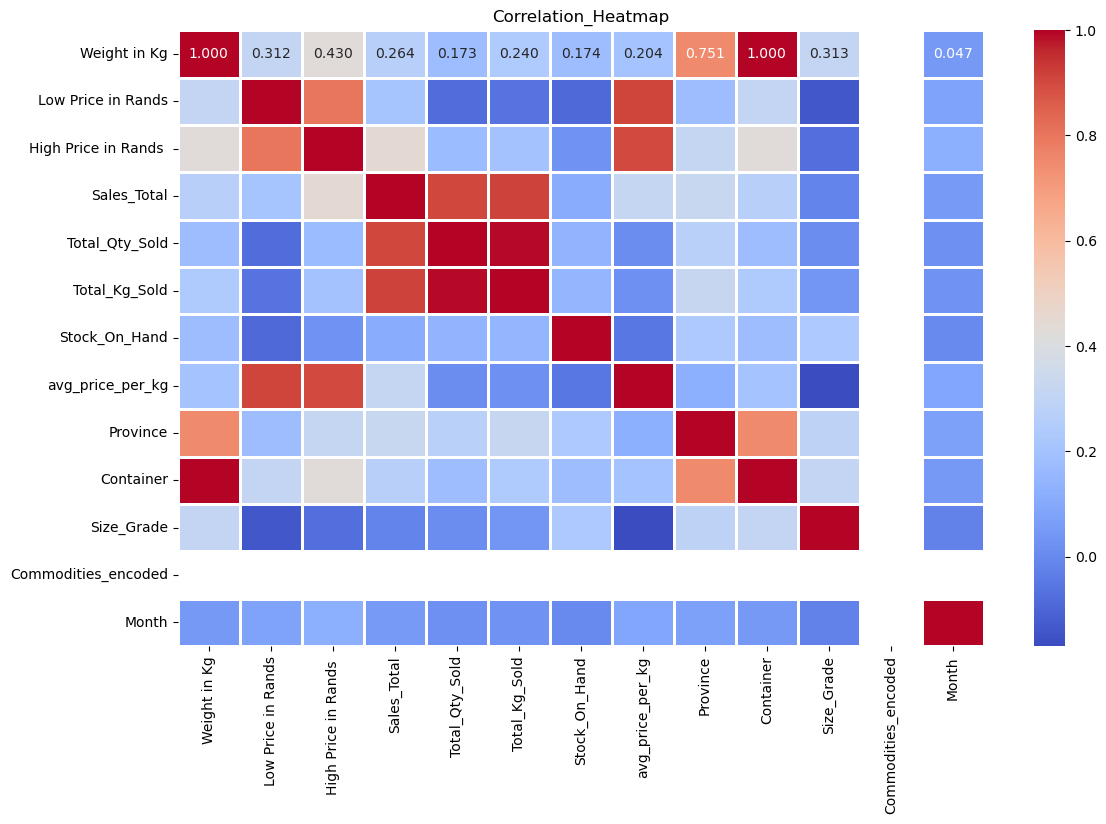

In [139]:
corr = df1.corr()

# Create heatmap with labels
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.9,
            xticklabels=corr.columns, yticklabels=corr.index)
plt.title('Correlation_Heatmap')
plt.show()


In [140]:
df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False)

avg_price_per_kg
avg_price_per_kg              1.000000
Low Price in Rands            0.910612
High Price in Rands           0.901921
Sales_Total                   0.317448
Container                     0.203913
Weight in Kg                  0.203913
Province                      0.120702
Month                         0.089977
Total_Kg_Sold                 0.019359
Total_Qty_Sold                0.009314
Stock_On_Hand                -0.054194
Size_Grade                   -0.170246
Commodities_encoded                NaN

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Features Correlating with Selling_Price')

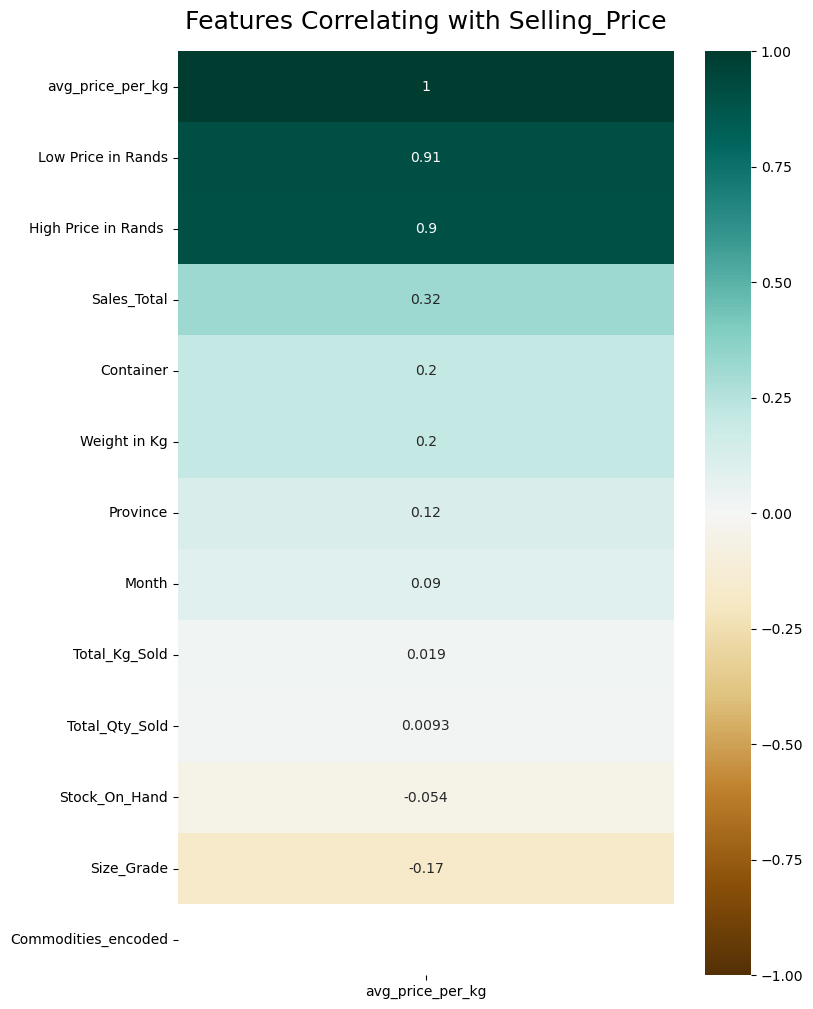

In [141]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling_Price', fontdict={'fontsize':18}, pad=16)

In [142]:
# plt.figure(figsize=(13, 8))
# sns.pairplot(df1)

In [143]:
# from scipy import stats

# # Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
# threshold = 3

# # Calculate Z-score for each column
# z_scores = np.abs(stats.zscore(df1))

# # Create a boolean array indicating whether each value is an outlier
# outlier_mask = (z_scores > threshold).any(axis=1)

# # Remove rows containing outliers
# df1 = df1[~outlier_mask]
# df1


<Axes: xlabel='Weight in Kg'>

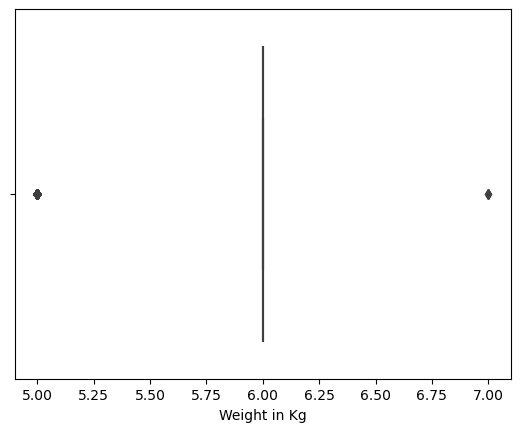

In [144]:
sns.boxplot(x=df1["Weight in Kg"])

In [145]:
#df1['avg_price_per_kg2'] = np.log(df1['avg_price_per_kg'])


<Axes: xlabel='avg_price_per_kg'>

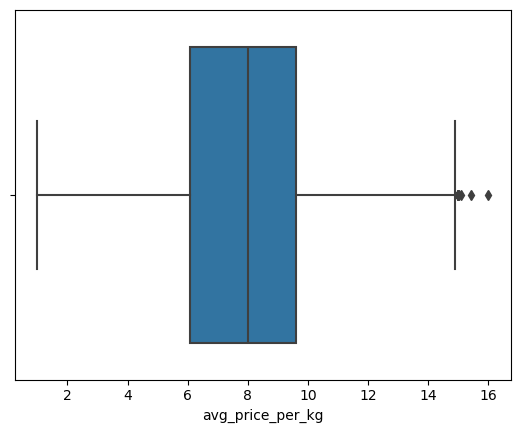

In [146]:
sns.boxplot(x=df1["avg_price_per_kg"])
#sns.boxplot(x=df1["avg_price_per_kg2"])

<Axes: xlabel='avg_price_per_kg'>

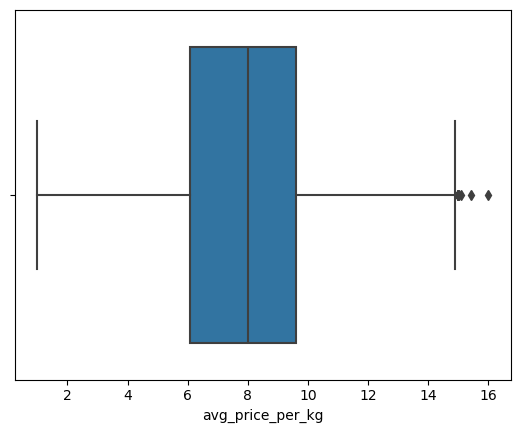

In [147]:
sns.boxplot(x=df1["avg_price_per_kg"])

In [148]:
#gg2 = gg[gg['High_Price'] < 120]
#sns.boxplot(x=df1["High Price in Rands"])

In [149]:
df1.shape

(1339, 13)

<Axes: xlabel='Low Price in Rands'>

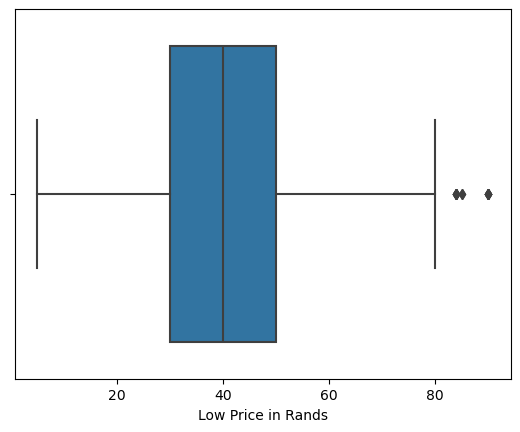

In [150]:
# gg = df1[df1['Low_Price'] < 100]
sns.boxplot(x=df1["Low Price in Rands"])

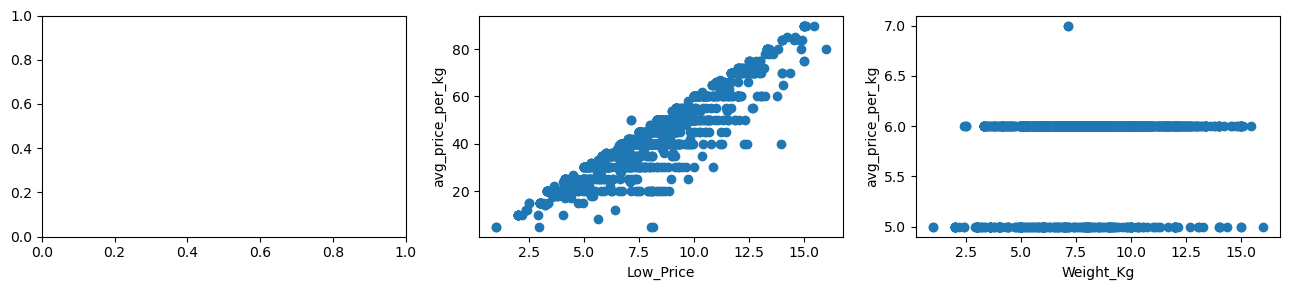

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))
# ax[0].scatter(df1['avg_price_per_kg'], df1['High Price in Rands'])
# ax[0].set_xlabel('Selling_Price')
# ax[0].set_ylabel('avg_price_per_kg')

ax[1].scatter(df1['avg_price_per_kg'], df1['Low Price in Rands'])
ax[1].set_ylabel('avg_price_per_kg')
ax[1].set_xlabel('Low_Price')

ax[2].scatter(df1['avg_price_per_kg'], df1['Weight in Kg'])
ax[2].set_ylabel('avg_price_per_kg')
ax[2].set_xlabel('Weight_Kg')

plt.tight_layout()
plt.show()


In [152]:
df1.head()

Weight in Kg  Low Price in Rands  High Price in Rands   Sales_Total  \
52            5.0                35.0                  50.0      15970.0   
108           6.0                45.0                  45.0      14040.0   
131           6.0                40.0                  50.0      35985.0   
167           5.0                20.0                  20.0       1140.0   
173           6.0                50.0                  72.0       9758.0   

     Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province  \
52              453         2265.0            297              7.05         5   
108             312         1872.0              0              7.50         6   
131             789         4734.0            453              7.60         6   
167              57          285.0              0              4.00         5   
173             156          936.0              0             10.43         6   

     Container  Size_Grade  Commodities_encoded  Month  
52           7           0                    0      3  
108          8          10                    0      3  
131          8           1                    0      1  
167          7           3                    0      4  
173          8           1                    0      3

In [153]:
# df1.drop(columns=['Date'], inplace=True)
# df1.info()

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 52 to 64365
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weight in Kg          1339 non-null   float64
 1   Low Price in Rands    1339 non-null   float64
 2   High Price in Rands   1339 non-null   float64
 3   Sales_Total           1339 non-null   float64
 4   Total_Qty_Sold        1339 non-null   int64  
 5   Total_Kg_Sold         1339 non-null   float64
 6   Stock_On_Hand         1339 non-null   int64  
 7   Province              1339 non-null   int64  
 8   Container             1339 non-null   int64  
 9   Size_Grade            1339 non-null   int64  
 10  Commodities_encoded   1339 non-null   int64  
 11  Month                 1339 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 136.0 KB


In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def backward_elimination_sklearn(X, y, n_features_to_select=None):
    # Create a linear regression model
    estimator = LinearRegression()
    
    # Initialize RFE
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    
    # Fit RFE
    selector = selector.fit(X, y)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    return selected_features


# Assuming X contains your features and y contains your target variable
# X and y should be DataFrames or arrays
# Perform backward elimination
selected_features = backward_elimination_sklearn(X, y)

# Train your model with the selected features
X_selected = X[selected_features]
model = LinearRegression().fit(X_selected, y)

# Print selected features
print("Selected Features:", selected_features.tolist())

# Print model coefficients
print("Model Coefficients:", model.coef_)


Selected Features: ['Weight in Kg', 'Low Price in Rands', 'High Price in Rands ', 'Province', 'Container', 'Month']
Model Coefficients: [-0.63888532  0.08422097  0.08787028  0.02301316 -0.63888532 -0.01081867]


In [156]:
df1.head(2)

Weight in Kg  Low Price in Rands  High Price in Rands   Sales_Total  \
52            5.0                35.0                  50.0      15970.0   
108           6.0                45.0                  45.0      14040.0   

     Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province  \
52              453         2265.0            297              7.05         5   
108             312         1872.0              0              7.50         6   

     Container  Size_Grade  Commodities_encoded  Month  
52           7           0                    0      3  
108          8          10                    0      3

['Province',
 'Container',
 'Size_Grade',
 'Commodities',
 'Weight_Kg',
 'Sales_Total',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'selling_price']

In [157]:
df1.drop(columns=['Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Commodities_encoded'], inplace=True)

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_58390/838115195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Commodities_encoded'], inplace=True)


In [158]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg']  

In [159]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 52 to 64365
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weight in Kg          1339 non-null   float64
 1   Low Price in Rands    1339 non-null   float64
 2   High Price in Rands   1339 non-null   float64
 3   Province              1339 non-null   int64  
 4   Container             1339 non-null   int64  
 5   Size_Grade            1339 non-null   int64  
 6   Month                 1339 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 83.7 KB


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared for training data
r2_train = r2_score(y_train, y_train_pred)

print("Training Metrics:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)


Training Metrics:
Mean Squared Error: 0.34703475067838757
Root Mean Squared Error: 0.5890965546312316
Mean Absolute Error: 0.3988418459512478
R-squared: 0.9478055150912784


In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



Mean Squared Error: 0.43437509801412827
Root Mean Squared Error: 0.6590713906809552
Mean Absolute Error: 0.4121371491322967
R-squared: 0.9325815540234395


In [162]:
# Assuming `X_train` is the dataset used for training the model
feature_names = X_train.columns.tolist()
num_features = len(feature_names)

print("Number of features:", num_features)
print("Feature names:", feature_names)


Number of features: 7
Feature names: ['Weight in Kg', 'Low Price in Rands', 'High Price in Rands ', 'Province', 'Container', 'Size_Grade', 'Month']


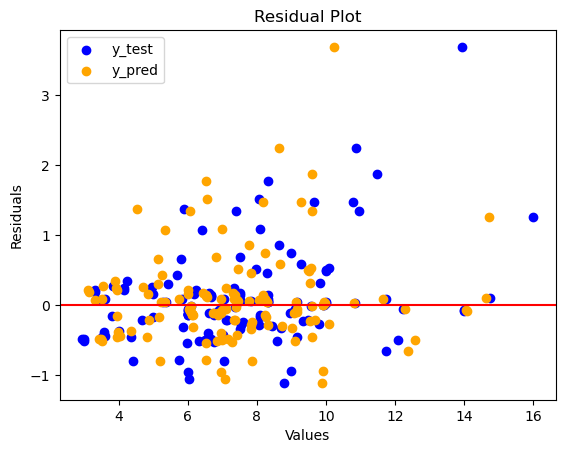

In [163]:
residuals = y_test - y_pred

# Scatter plot of residuals for y_test
plt.scatter(y_test, residuals, color='blue', label='y_test')
# Scatter plot of residuals for y_pred
plt.scatter(y_pred, residuals, color='orange', label='y_pred')

plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

In [164]:
# import pickle

# model_save_path = "mlr.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(model,file)

In [165]:
import pickle

# Saving the model
with open('mlr.pkl', 'wb') as file:
    pickle.dump(model, file)

# Loading the model
with open('mlr.pkl', 'rb') as file:
    clf = pickle.load(file)

# Making a prediction using the loaded model
prediction = clf.predict([[5, 50, 3, 6, 9, 10,5]])

# Displaying the prediction
print(prediction)


[4.22991781]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [166]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)  # Example range of alpha values

# Set up the parameter grid for Lasso and Ridge regression
param_grid_lasso = {'alpha': alphas}
param_grid_ridge = {'alpha': alphas}

# Initialize GridSearchCV for Lasso and Ridge regression
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV objects to the training data
grid_search_lasso.fit(X_train, y_train)
grid_search_ridge.fit(X_train, y_train)

# Get the best alpha values
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

print("Best alpha for Lasso:", best_alpha_lasso)
print("Best alpha for Ridge:", best_alpha_ridge)

# Initialize Lasso and Ridge regression models with the best alpha values
lasso_model = Lasso(alpha=best_alpha_lasso)
ridge_model = Ridge(alpha=best_alpha_ridge)

# Fit the models to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set for Lasso regression
y_pred_lasso = lasso_model.predict(X_test)

# Make predictions on the test set for Ridge regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate the models for Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)
print()

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+02, tolerance: 6.454e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.576e+02, tolerance: 6.435e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+02, toler

Best alpha for Lasso: 0.001
Best alpha for Ridge: 1.0
Lasso Regression:
Mean Squared Error: 0.4344083454367279
Root Mean Squared Error: 0.6590966131279449
Mean Absolute Error: 0.4112510624733198
R-squared: 0.9325763937608585

Ridge Regression:
Mean Squared Error: 0.4343811045984362
Root Mean Squared Error: 0.6590759475192796
Mean Absolute Error: 0.4117216916026966
R-squared: 0.9325806217541139


In [167]:
from sklearn.linear_model import Lasso, Ridge

# Step 2: Model Creation
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.0001)  # You can adjust the alpha value

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value

# Fit the models to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set for Lasso regression
y_pred_lasso = lasso_model.predict(X_test)

# Make predictions on the test set for Ridge regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate the models for Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)
print()

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Lasso Regression:
Mean Squared Error: 0.4343066761866478
Root Mean Squared Error: 0.6590194808855409
Mean Absolute Error: 0.4120812264915496
R-squared: 0.9325921736314712

Ridge Regression:
Mean Squared Error: 0.4343811045984362
Root Mean Squared Error: 0.6590759475192796
Mean Absolute Error: 0.4117216916026966
R-squared: 0.9325806217541139


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e+02, tolerance: 8.012e-01
  model = cd_fast.enet_coordinate_descent(


In [168]:
from sklearn.linear_model import Lasso, Ridge

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()
# Fit the Linear Regression model to the training data
linear_model.fit(X_train, y_train)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
# Fit the Lasso regression model to the training data
lasso_model.fit(X_train, y_train)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value
# Fit the Ridge regression model to the training data
ridge_model.fit(X_train, y_train)

# Get the coefficients for Linear Regression model
linear_coefs = linear_model.coef_

# Get the coefficients for Lasso regression model
lasso_coefs = lasso_model.coef_

# Get the coefficients for Ridge regression model
ridge_coefs = ridge_model.coef_

# Compare the coefficients
print("Linear Regression Coefficients:", linear_coefs)
print("Lasso Regression Coefficients:", lasso_coefs)
print("Ridge Regression Coefficients:", ridge_coefs)


Linear Regression Coefficients: [-0.62922627  0.08709866  0.08427262  0.01166611 -0.62922627  0.0034765
 -0.00854781]
Lasso Regression Coefficients: [-0.          0.08648745  0.07538065 -0.         -0.45303692 -0.01530007
 -0.        ]
Ridge Regression Coefficients: [-0.62875412  0.0870956   0.08426861  0.01125382 -0.62875412  0.00346377
 -0.00854346]


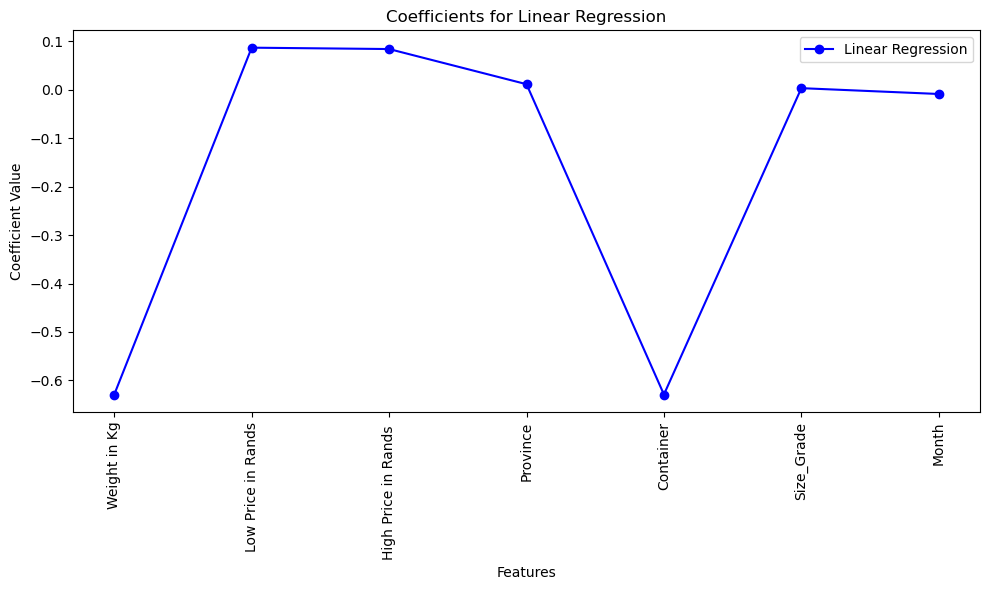

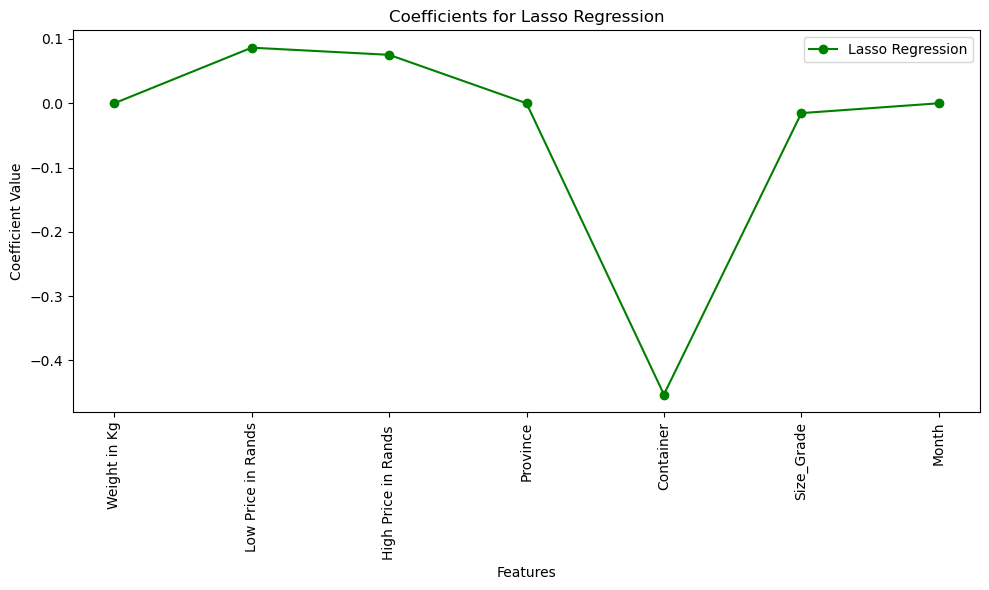

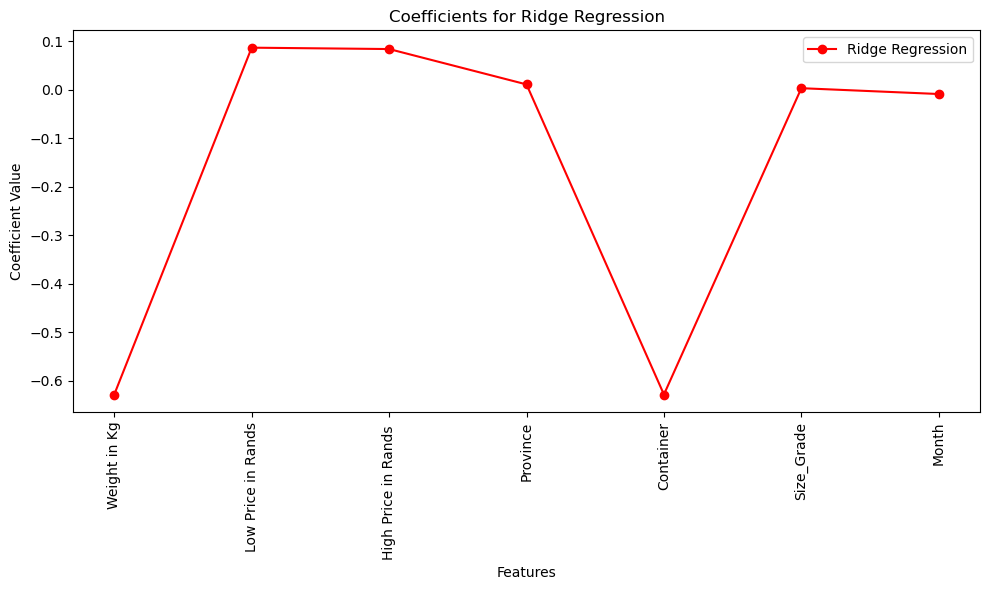

In [169]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Plotting coefficients for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), linear_coefs, marker='o', label='Linear Regression', color='blue')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Coefficients for Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting coefficients for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), lasso_coefs, marker='o', label='Lasso Regression', color='green')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Coefficients for Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting coefficients for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), ridge_coefs, marker='o', label='Ridge Regression', color='red')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Coefficients for Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()


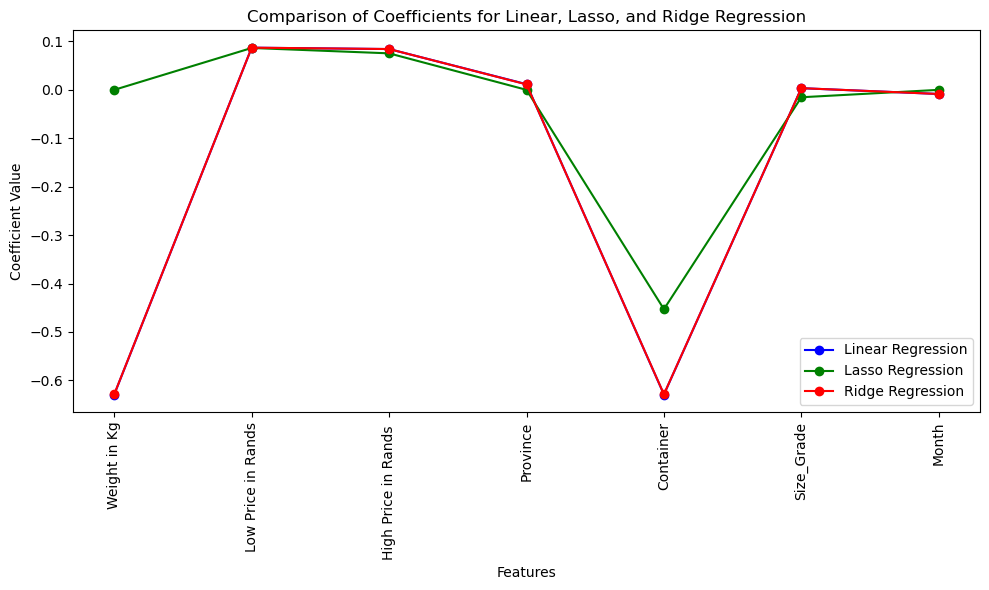

In [170]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Plotting coefficients for all models
plt.figure(figsize=(10, 6))

# Linear Regression
plt.plot(range(len(feature_names)), linear_coefs, marker='o', label='Linear Regression', color='blue')

# Lasso Regression
plt.plot(range(len(feature_names)), lasso_coefs, marker='o', label='Lasso Regression', color='green')

# Ridge Regression
plt.plot(range(len(feature_names)), ridge_coefs, marker='o', label='Ridge Regression', color='red')

plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Comparison of Coefficients for Linear, Lasso, and Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()


In [171]:
# from scipy.stats import linregress


# slope, intercept, _, _, _ = linregress(y_test, residuals)
# best_fit_line = slope * y_test + intercept

# # Scatter plot of residuals with best fit line
# plt.scatter(y_test, residuals)
# plt.plot(y_test, best_fit_line, color='r')
# plt.xlabel("Actual Values")
# plt.ylabel("Residuals")
# plt.title("Residual Plot with Best Fit Line")
# plt.show()


In [172]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [173]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred_val = dt.predict(X_val)
dt_pred_test = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred_val = rf.predict(X_val)
rf_pred_test = rf.predict(X_test)

# XGBoost
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_pred_val = xgboost.predict(X_val)
xgboost_pred_test = xgboost.predict(X_test)

# CatBoost
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)
catboost_pred_val = catboost.predict(X_val)
catboost_pred_test = catboost.predict(X_test)

# Evaluation Metrics for Validation Set
def evaluate_model_val(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mse, mae

dt_metrics_val = evaluate_model_val(y_val, dt_pred_val)
rf_metrics_val = evaluate_model_val(y_val, rf_pred_val)
xgboost_metrics_val = evaluate_model_val(y_val, xgboost_pred_val)
catboost_metrics_val = evaluate_model_val(y_val, catboost_pred_val)

# Evaluation Metrics for Test Set
def evaluate_model_test(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mse, mae

dt_metrics_test = evaluate_model_test(y_test, dt_pred_test)
rf_metrics_test = evaluate_model_test(y_test, rf_pred_test)
xgboost_metrics_test = evaluate_model_test(y_test, xgboost_pred_test)
catboost_metrics_test = evaluate_model_test(y_test, catboost_pred_test)

# Print Validation Metrics
print("Validation Metrics:")
print("Decision Tree Metrics (R^2, RMSE, MSE, MAE):", dt_metrics_val)
print("Random Forest Metrics (R^2, RMSE, MSE, MAE):", rf_metrics_val)
print("XGBoost Metrics (R^2, RMSE, MSE, MAE):", xgboost_metrics_val)
print("CatBoost Metrics (R^2, RMSE, MSE, MAE):", catboost_metrics_val)

# Print Test Metrics
print("\nTest Metrics:")
print("Decision Tree Metrics (R^2, RMSE, MSE, MAE):", dt_metrics_test)
print("Random Forest Metrics (R^2, RMSE, MSE, MAE):", rf_metrics_test)
print("XGBoost Metrics (R^2, RMSE, MSE, MAE):", xgboost_metrics_test)
print("CatBoost Metrics (R^2, RMSE, MSE, MAE):", catboost_metrics_test)


Learning rate set to 0.040524
0:	learn: 2.5130204	total: 59.1ms	remaining: 59.1s
1:	learn: 2.4306433	total: 59.3ms	remaining: 29.6s
2:	learn: 2.3529043	total: 59.6ms	remaining: 19.8s
3:	learn: 2.2800653	total: 59.9ms	remaining: 14.9s
4:	learn: 2.2152306	total: 60.1ms	remaining: 12s
5:	learn: 2.1484301	total: 60.4ms	remaining: 10s
6:	learn: 2.0833642	total: 60.6ms	remaining: 8.6s
7:	learn: 2.0172109	total: 61.1ms	remaining: 7.57s
8:	learn: 1.9607992	total: 61.4ms	remaining: 6.76s
9:	learn: 1.9059557	total: 61.7ms	remaining: 6.1s
10:	learn: 1.8511360	total: 61.9ms	remaining: 5.57s
11:	learn: 1.7975490	total: 62.2ms	remaining: 5.12s
12:	learn: 1.7473192	total: 62.5ms	remaining: 4.74s
13:	learn: 1.6986653	total: 62.7ms	remaining: 4.42s
14:	learn: 1.6523685	total: 62.9ms	remaining: 4.13s
15:	learn: 1.6040507	total: 63.2ms	remaining: 3.89s
16:	learn: 1.5601331	total: 63.4ms	remaining: 3.67s
17:	learn: 1.5173177	total: 63.6ms	remaining: 3.47s
18:	learn: 1.4761005	total: 64ms	remaining: 3.3s
1

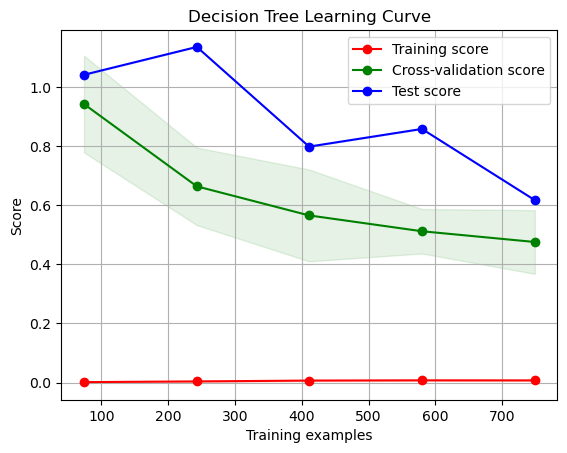

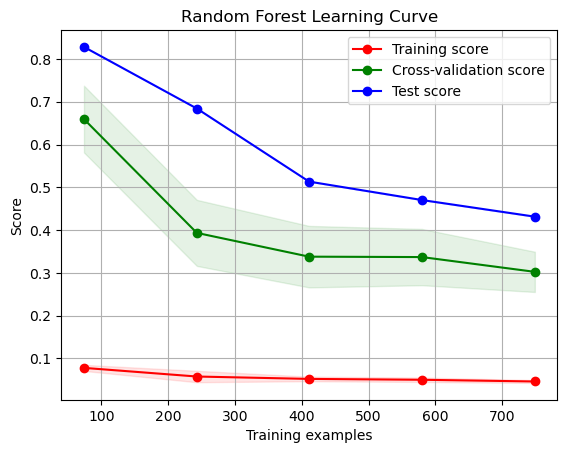

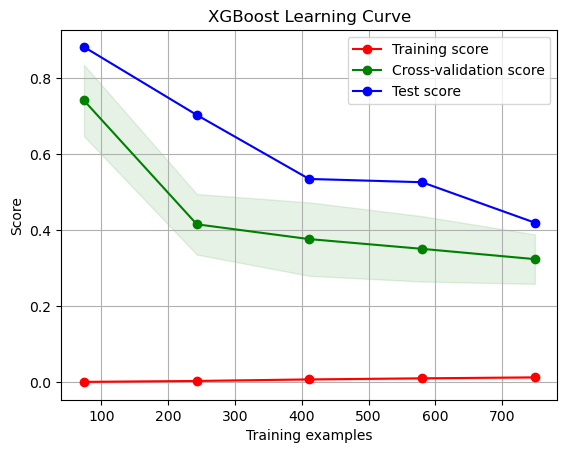

Learning rate set to 0.027134
0:	learn: 2.3358074	total: 1.02ms	remaining: 1.02s
1:	learn: 2.3069480	total: 1.25ms	remaining: 626ms
2:	learn: 2.2798846	total: 1.33ms	remaining: 443ms
3:	learn: 2.2486506	total: 1.61ms	remaining: 402ms
4:	learn: 2.2163373	total: 2.14ms	remaining: 426ms
5:	learn: 2.1853175	total: 2.26ms	remaining: 374ms
6:	learn: 2.1496269	total: 2.55ms	remaining: 361ms
7:	learn: 2.1174168	total: 2.9ms	remaining: 360ms
8:	learn: 2.0854463	total: 3ms	remaining: 331ms
9:	learn: 2.0594476	total: 3.22ms	remaining: 319ms
10:	learn: 2.0369767	total: 3.54ms	remaining: 318ms
11:	learn: 2.0054916	total: 3.72ms	remaining: 307ms
12:	learn: 1.9813148	total: 3.83ms	remaining: 291ms
13:	learn: 1.9565046	total: 3.88ms	remaining: 273ms
14:	learn: 1.9317884	total: 3.98ms	remaining: 261ms
15:	learn: 1.9013727	total: 4.2ms	remaining: 258ms
16:	learn: 1.8773505	total: 4.3ms	remaining: 249ms
17:	learn: 1.8518653	total: 4.4ms	remaining: 240ms
18:	learn: 1.8256341	total: 4.69ms	remaining: 242ms

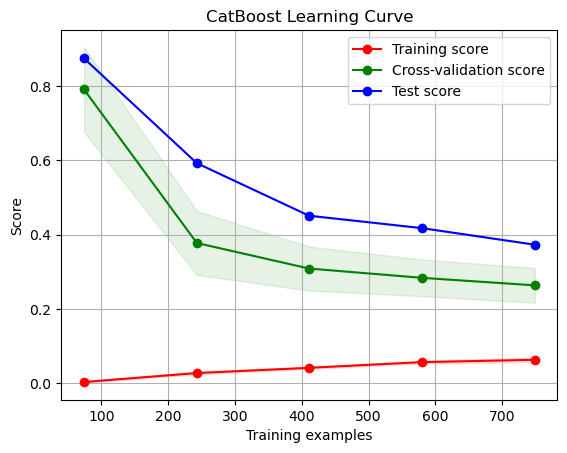

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(train_sizes, train_scores_mean, train_scores_std, 
                        val_scores_mean, val_scores_std, test_scores_mean=None, test_scores_std=None,
                        title="Learning Curve", ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    if test_scores_mean is not None:
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="b")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
                 label="Test score")
    plt.legend(loc="best")
    return plt

# Define a function to compute test scores
def compute_test_scores(estimator, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            scoring="neg_mean_squared_error")
    test_scores = []
    for train_size, train_score in zip(train_sizes, train_scores):
        estimator.fit(X_train[:int(train_size)], y_train[:int(train_size)])
        test_score = mean_squared_error(y_test, estimator.predict(X_test))
        test_scores.append(test_score)
    return train_sizes, np.array(test_scores), np.zeros(len(test_scores))  # Standard deviation not applicable for single scores


# Decision Tree Learning Curve
dt_train_sizes, dt_train_scores, dt_val_scores = learning_curve(dt, X_train, y_train, cv=5,
                                                                train_sizes=np.linspace(0.1, 1.0, 5),
                                                                scoring="neg_mean_squared_error")
dt_test_sizes, dt_test_scores_mean, dt_test_scores_std = compute_test_scores(dt, X_train, y_train, X_test, y_test)
plot_learning_curve(dt_train_sizes, -dt_train_scores.mean(axis=1), dt_train_scores.std(axis=1),
                    -dt_val_scores.mean(axis=1), dt_val_scores.std(axis=1),
                    dt_test_scores_mean, dt_test_scores_std,
                    title="Decision Tree Learning Curve")
plt.show()

# Random Forest Learning Curve
rf_train_sizes, rf_train_scores, rf_val_scores = learning_curve(rf, X_train, y_train, cv=5,
                                                                train_sizes=np.linspace(0.1, 1.0, 5),
                                                                scoring="neg_mean_squared_error")
rf_test_sizes, rf_test_scores_mean, rf_test_scores_std = compute_test_scores(rf, X_train, y_train, X_test, y_test)
plot_learning_curve(rf_train_sizes, -rf_train_scores.mean(axis=1), rf_train_scores.std(axis=1),
                    -rf_val_scores.mean(axis=1), rf_val_scores.std(axis=1),
                    rf_test_scores_mean, rf_test_scores_std,
                    title="Random Forest Learning Curve")
plt.show()

# XGBoost Learning Curve
xgboost_train_sizes, xgboost_train_scores, xgboost_val_scores = learning_curve(xgboost, X_train, y_train, cv=5,
                                                                                train_sizes=np.linspace(0.1, 1.0, 5),
                                                                                scoring="neg_mean_squared_error")
xgboost_test_sizes, xgboost_test_scores_mean, xgboost_test_scores_std = compute_test_scores(xgboost, X_train, y_train, X_test, y_test)
plot_learning_curve(xgboost_train_sizes, -xgboost_train_scores.mean(axis=1), xgboost_train_scores.std(axis=1),
                    -xgboost_val_scores.mean(axis=1), xgboost_val_scores.std(axis=1),
                    xgboost_test_scores_mean, xgboost_test_scores_std,
                    title="XGBoost Learning Curve")
plt.show()

# CatBoost Learning Curve
catboost_train_sizes, catboost_train_scores, catboost_val_scores = learning_curve(catboost, X_train, y_train, cv=5,
                                                                                   train_sizes=np.linspace(0.1, 1.0, 5),
                                                                                   scoring="neg_mean_squared_error")
catboost_test_sizes, catboost_test_scores_mean, catboost_test_scores_std = compute_test_scores(catboost, X_train, y_train, X_test, y_test)
plot_learning_curve(catboost_train_sizes, -catboost_train_scores.mean(axis=1), catboost_train_scores.std(axis=1),
                    -catboost_val_scores.mean(axis=1), catboost_val_scores.std(axis=1),
                    catboost_test_scores_mean, catboost_test_scores_std,
                    title="CatBoost Learning Curve")
plt.show()



In [176]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def backward_elimination_sklearn(X, y, n_features_to_select=None):
    # Create a linear regression model
    estimator = LinearRegression()
    
    # Initialize RFE
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    
    # Fit RFE
    selector = selector.fit(X, y)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    return selected_features

# Example usage
# X is your feature matrix, y is your target variable
# X should be a DataFrame with all the features
# y should be a Series with the target variable

# Perform backward elimination
selected_features = backward_elimination_sklearn(X, y)

# Train your model with the selected features
X_selected = X[selected_features]
model = LinearRegression().fit(X_selected, y)

# Print selected features
print("Selected Features:", selected_features.tolist())

# Print model coefficients
print("Model Coefficients:", model.coef_)


Selected Features: ['Weight in Kg', 'High Price in Rands ', 'Container']
Model Coefficients: [ 8.22814175e+12  1.49780273e-01 -8.22814175e+12]
